In [19]:
#1 Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
import numpy as np

In [20]:
#2 Importing the Mall_Customers dataset by pandas
dataset = pd.read_csv('Dataset/Mall_Customers.csv')
X = dataset.iloc[:, [3,4]].values

In [21]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', 
                             linkage ='ward')
y_hc=hc.fit_predict(X)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

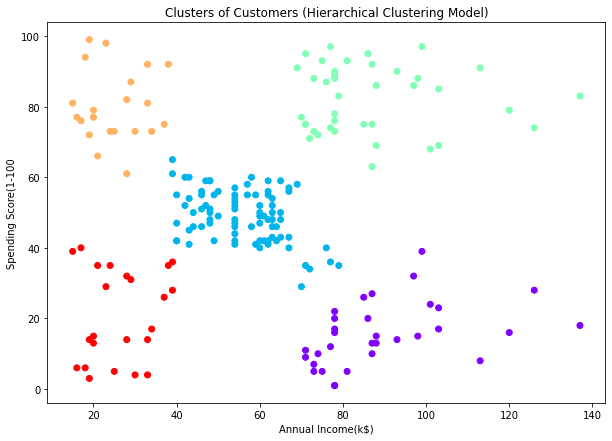

In [25]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=y_hc, cmap='rainbow')
plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

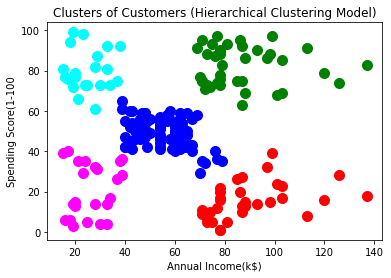

In [22]:
#5 Visualizing the clusters. 
#This code is similar to k-means 
#visualization code. We only replace the y_kmeans vector name to 
#y_hc for the hierarchical clustering
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')

plt.show()

How do we figure out the best number of clusters based on this diagram? We want to find the longest vertical distance we can without crossing any horizontal lines, which is the red-framed line in the diagram above. Let’s count the lines on the diagram and figure out how many clusters are best. For this dataset, the cluster number will be 5.

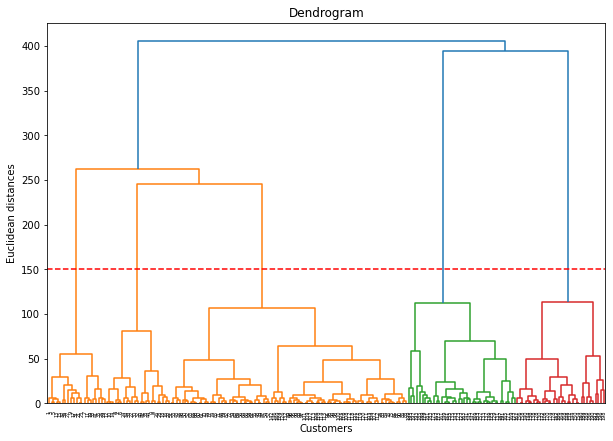

In [13]:
#This new step in hierarchical clustering also entails 
#determining the optimal number of clusters. 
#We’re not going to use the elbow method this time. 
#We’ll make use of the dendrogram.

#3 Using the dendrogram to find the optimal numbers of clusters. 
# First thing we're going to do is to import scipy library. scipy is an open source 
# Python library that contains tools to do hierarchical clustering and building dendrograms.
# Only import the needed tool.
import scipy.cluster.hierarchy as sch

#Lets create a dendrogram variable 
# linkage is actually the algorithm itself of hierarchical clustering and 
#then in linkage we have to specify on which data we apply and engage.
#This is X dataset
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.axhline(y=150, color='r', linestyle='--')
plt.show()

#count the lines on the diagram and figure out how many clusters are best. 
#For this dataset, the cluster number will be 5.